# A machine learning approach for the classification of cardiac arrhythmia
The aim of this project is to determine the type of arrhythmia from the ECG recordings.

Eleonora Detić

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy import stats

### Data loading

In [11]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')
df.dataframeName = 'data_arrhythmia.csv'

In [43]:
#data_fake = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None)
with open("arrhythmia.names") as f:
    print(f.read())

1. Title: Cardiac Arrhythmia Database

2. Sources:
   (a) Original owners od Database:
       -- 1. H. Altay Guvenir, PhD., 
             Bilkent University,
             Department of Computer Engineering and Information Science,
             06533 Ankara, Turkey
             Phone: +90 (312) 266 4133
             Email: guvenir@cs.bilkent.edu.tr

       -- 2. Burak Acar, M.S.,
             Bilkent University, 
             EE Eng. Dept. 
             06533 Ankara, Turkey
             Email: buraka@ee.bilkent.edu.tr

       -- 2. Haldun Muderrisoglu, M.D., Ph.D., 
             Baskent University, 
             School of Medicine
             Ankara, Turkey

   (b) Donor: H. Altay Guvenir
              Bilkent University,
              Department of Computer Engineering and Information Science,
              06533 Ankara, Turkey
              Phone: +90 (312) 266 4133
              Email: guvenir@cs.bilkent.edu.tr

   (c) Date: January, 1998

3. Past Usage:
   1. H. Altay Guvenir, Bura

### Data survey

In [13]:
df.shape

(452, 280)

In [44]:
df.head()

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0   75    0     190      80            91           193           371   
1   56    1     165      64            81           174           401   
2   54    0     172      95           138           163           386   
3   55    0     175      94           100           202           380   
4   75    0     190      80            88           181           360   

   t_interval  p_interval  qrs  ...   KY    KZ   LA   LB LC   LD   LE    LF  \
0         174         121  -16  ...  0.0   9.0 -0.9  0.0  0  0.9  2.9  23.3   
1         149          39   25  ...  0.0   8.5  0.0  0.0  0  0.2  2.1  20.4   
2         185         102   96  ...  0.0   9.5 -2.4  0.0  0  0.3  3.4  12.3   
3         179         143   28  ...  0.0  12.2 -2.2  0.0  0  0.4  2.6  34.6   
4         177         103  -16  ...  0.0  13.1 -3.6  0.0  0 -0.1  3.9  25.4   

     LG  diagnosis  
0  49.4          8  
1  38.8          6  
2  49.0         10  
3  61.6          1  
4  62.8          7  

[5 rows x 280 columns]

In our data set, we have 452 patients and 279 features for each patient. Last column is interpreted as a number of heart arrhythmia claster. According to documentation, missing attribute values are distinguished with '?' so we will replace them with "NaN".

In [57]:
df = df.replace('?', np.NaN)
df.isna().sum().nlargest(10)

J               376
P                22
T                 8
QRST              1
heart_rate        1
age               0
sex               0
height            0
weight            0
qrs_duration      0
dtype: int64

As we can see, in column 'J' we have a lof of missing values, more than 80%, so we will drop that column.

In [61]:
df['J']

0      NaN
1      NaN
2       23
3      NaN
4      NaN
      ... 
447    NaN
448    NaN
449     84
450    103
451    NaN
Name: J, Length: 452, dtype: object

In [63]:
df.drop(["J"], axis=1, inplace=True)

#### Descriptive statistics

KstestResult(statistic=0.995983935741692, pvalue=0.0)
KstestResult(statistic=0.9887978852196014, pvalue=0.0)


age                                                   
     count       mean        std  min   25%   50%   75%   max
sex                                                          
0    203.0  47.546798  16.519761  0.0  37.5  47.0  59.0  80.0
1    249.0  45.594378  16.404173  1.0  34.0  46.0  58.0  83.0

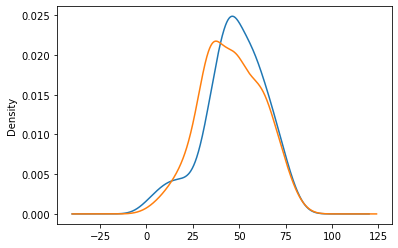

In [41]:
print(stats.kstest(df.loc[df['sex'] == 1]['age'], 'norm'))
print(stats.kstest(df.loc[df['sex'] == 0]['age'], 'norm'))
df.groupby('sex').age.plot(kind='kde') #vizualni prikaz
df[["sex", "age"]].groupby("sex").describe() #deskriptivna statistika

The above results show the distribution graph and descriptive statistics, for both women and men. We conducted ks test and concluded that at each standard level of significance we do not reject the null hypothesis, that is, that our sample of years for each sex follows a normal distribution.

#### Data transformation

In [39]:
print(stats.kstest(df.loc[df['sex'] == 1]['age'], 'norm'))

KstestResult(statistic=0.995983935741692, pvalue=0.0)


#### Data cleaning

In [40]:
print(stats.kstest(df.loc[df['sex'] == 0]['age'], 'norm'))

KstestResult(statistic=0.9887978852196014, pvalue=0.0)


#### Data validation

#### Data augmentation

#### Feature enginerring

## Missing Values

In [33]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data)
SimpleImputer()
data = imp_mean.transform(data)
data = pd.DataFrame(data)


In [34]:
X = data.loc[:,0:278]
y = data.loc[:,279]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
pca = PCA(.99)
pca.fit(X_train)

PCA(n_components=0.99)

In [39]:
kk = pca.transform(X_train)